#Configurar

Directorio raiz. Debe tenr una subcarpeta que se llame _Datasets_.

In [1]:
dir_raiz_datos = '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/19050 - Argelia/'
dir_raiz_model = '/content/drive/MyDrive/- Cañengo -/- igac -/2023/Celula Automata/Notebooks Colab/03 ajuste modelos/'

Códigos de coberturas de nubes.

In [2]:
cods_cob_nubes = [99]

Radios de las vecindades definidos EN LA CONSTRUCCIÓN DE DATOS PARA ENTRENAMIENTO. Siempre incluir el cero (0).

In [3]:
radios = [0,10]

Nombre de la capa de inclinación, sin extensión.

In [4]:
nom_slp = 'slope_degrees_final'

Semilla para replicar la simulación.

In [5]:
semilla = 12345

#0. Entorno

In [6]:
%%capture
from google.colab import drive
drive.mount('/content/drive')

In [7]:
%%capture
!pip install rasterio

import rasterio as rs
from rasterio.plot import show

In [8]:
# explorar archivos
import glob
import os

In [9]:
import pandas as pd

In [10]:
# histograma
from matplotlib import pyplot as plt
# barplot
import seaborn as sns

In [11]:
from pickle import load
clf = load(open(dir_raiz_model+'OneVsRestDecisionTree.pkl', 'rb'))

Para hacer gráficas dinámicas.

In [12]:
import plotly.express as px

Para trabajar datos matriciales

In [13]:
import numpy as np
np.version.version # versioon utilizada y funcional dentro de este notebook

'1.22.4'

In [14]:
np.seterr(invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

Para escribir el dataset en Drive y en un .csv

In [15]:
import csv

Para tomar el tiempo de entrenamiento.

In [16]:
from datetime import datetime

Para generar aleatoriamente el conjunto de datos de Entrenaimento y Prueba.

In [17]:
import random
random.seed(semilla)

In [18]:
from numpy.random import choice

#1. Importar

**Drivers**

Extrae la ruta de los tifs de las capas.

In [19]:
drivers_dirs = glob.glob(os.path.join(dir_raiz_datos,"Drivers/*.tif"))

Se importan los rásters.

In [20]:
for dir in drivers_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [21]:
drivers_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in drivers_dirs ])

---

**Constrains**

Extrae la ruta de los tifs de las capas.

In [22]:
constrs_dirs = glob.glob(os.path.join(dir_raiz_datos,"Constrains/*.tif"))

Se importan los rásters.

In [23]:
for dir in constrs_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [24]:
constrs_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in constrs_dirs ])

---

**Última cobertura**

Extrae la ruta del tif que tiene los datos de coberturas del último periodo en la ruta.

In [25]:
cob_dirs = glob.glob(os.path.join(dir_raiz_datos,"Coberturas/*.tif"))

Se importan los rásters.

In [26]:
for dir in cob_dirs:
  nom = os.path.splitext( os.path.split(dir)[1] )[0]
  globals()[ nom ] = rs.open( dir ).read()[0]

Se genera una lista con los nombres de los rásters.

In [27]:
cob_nams = sorted([ os.path.splitext( os.path.split(dir)[1] )[0] for dir in cob_dirs ])

#2. Explorar

**Drivers**

Se exploran los rásters de los Drivers.

In [28]:
drivers_nams

['centro_poblados_cabeceras_proximity',
 'dem_argelia',
 'drenaje_senc_proximity',
 'slope_degrees_final',
 'vias_proximity']

In [29]:
slope_degrees_final[slope_degrees_final < 0] = 0

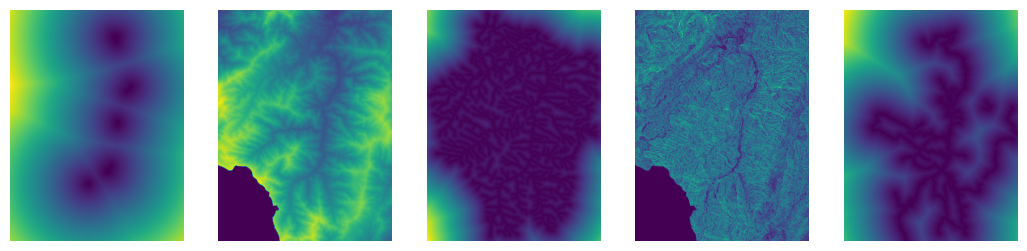

In [30]:
plt.figure(figsize=(13,13))
for n, nom in zip(range(len(drivers_nams)), drivers_nams):
  plt.subplot(1,len(drivers_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [31]:
for nom in drivers_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

centro_poblados_cabeceras_proximity:
(3362, 2526)
 
dem_argelia:
(3362, 2526)
 
drenaje_senc_proximity:
(3362, 2526)
 
slope_degrees_final:
(3362, 2526)
 
vias_proximity:
(3362, 2526)
 


---

**Constrains**

In [32]:
constrs_nams

['mpio_mask_binario', 'raster_ambiental_binario', 'raster_comunitario_binario']

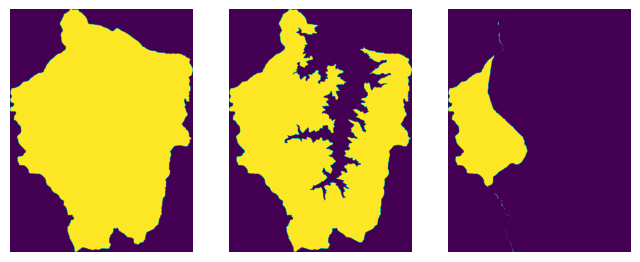

In [33]:
plt.figure(figsize=(8,8))
for n, nom in zip(range(len(constrs_nams)), constrs_nams):
  plt.subplot(1,len(constrs_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [34]:
for nom in constrs_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

mpio_mask_binario:
(3362, 2526)
 
raster_ambiental_binario:
(3362, 2526)
 
raster_comunitario_binario:
(3362, 2526)
 


In [35]:
for nom in constrs_nams:
  print( nom + ':' )
  print( pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).valores.value_counts() )  
  print( ' ' )

mpio_mask_binario:
1    5415641
0    3076771
Name: valores, dtype: int64
 
raster_ambiental_binario:
1    4253873
0    4238539
Name: valores, dtype: int64
 
raster_comunitario_binario:
0    7515885
1     976527
Name: valores, dtype: int64
 


In [36]:
cob_nams

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012']

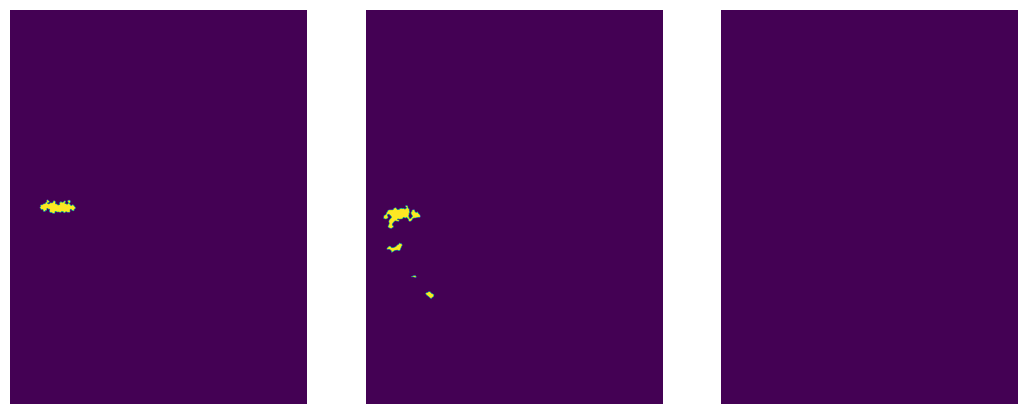

In [37]:
plt.figure(figsize=(13,13))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  ax = plt.imshow( np.isin(locals()[ nom ], cods_cob_nubes ) )
  plt.axis('off')
  ax
plt.show()

---

**Coberturas**

In [38]:
cob_nams

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012']

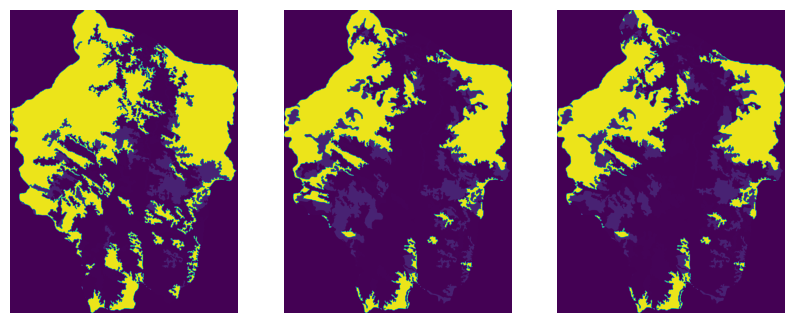

In [39]:
plt.figure(figsize=(10,10))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

In [40]:
cob_nams

['cob_1_2000_2002', 'cob_2_2005_2009', 'cob_3_2010_2012']

In [41]:
s = pd.DataFrame(locals()[ cob_nams[0] ].ravel(), columns= ['valores']).value_counts().sort_index().to_frame()

for nom in cob_nams[1:]:
  s = pd.merge( s , pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).value_counts().sort_index().to_frame() , how='outer', left_index=True , right_index=True )

s.columns = cob_nams

s

,cob_1_2000_2002,cob_2_2005_2009,cob_3_2010_2012
valores,,,
0,3076771.0,3076771.0,3076771.0
99,20261.0,30637.0,NaN
111,3634.0,5216.0,5216.0
231,288792.0,440484.0,145853.0
232,NaN,NaN,608.0
233,60559.0,53950.0,218037.0
241,NaN,12504.0,NaN
242,138238.0,448591.0,330657.0
243,673320.0,880941.0,1079846.0


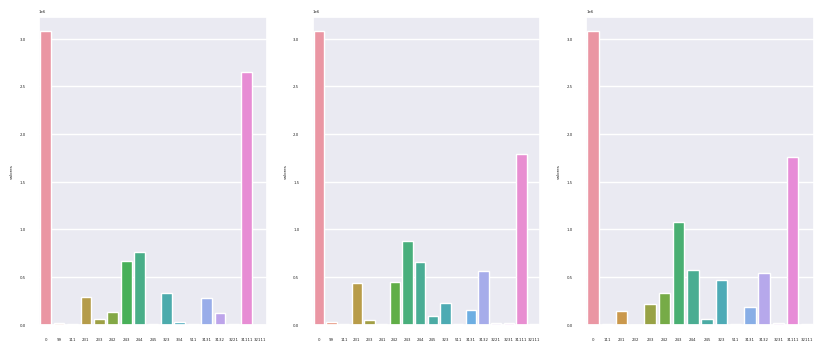

In [42]:
sns.set(font_scale=0.25)
plt.figure(figsize=(10,4))
for n, nom in zip(range(len(cob_nams)), cob_nams):
  plt.subplot(1,len(cob_nams),n+1)
  d = pd.DataFrame(locals()[ nom ].ravel(), columns= ['valores']).valores.value_counts()
  sns.barplot(x=d.index, y=d)
plt.show()

In [43]:
for nom in cob_nams:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

cob_1_2000_2002:
(3362, 2526)
 
cob_2_2005_2009:
(3362, 2526)
 
cob_3_2010_2012:
(3362, 2526)
 


---

#3. Escenarios y periodos

Escenarios

In [44]:
constrs_nams.remove('mpio_mask_binario')

constrains_binario = np.invert( locals()[constrs_nams[0]] )
for n in range(len(constrs_nams)):
  constrains_binario = constrains_binario & np.invert( locals()[constrs_nams[n]] )
constrains_binario = constrains_binario & locals()['mpio_mask_binario']

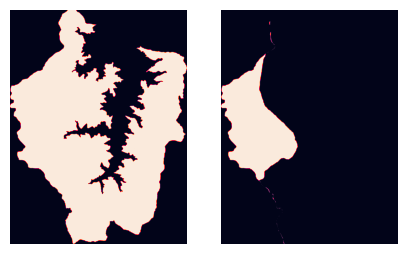

In [45]:
plt.figure(figsize=(5,5))
for n, nom in zip(range(len(constrs_nams)), constrs_nams):
  plt.subplot(1,len(constrs_nams),n+1)
  ax = plt.imshow(locals()[nom])
  plt.axis('off')
  ax
plt.show()

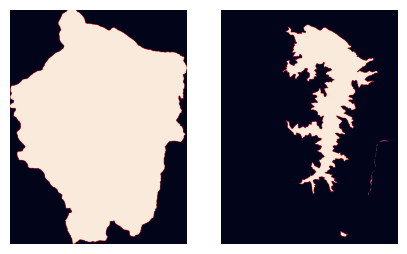

In [46]:
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
ax = plt.imshow(mpio_mask_binario)
plt.axis('off')
ax
plt.subplot(1,2,2)
ax = plt.imshow(constrains_binario)
plt.axis('off')
ax
plt.show()

Nombres de las capas de los rásters booleanos de los escenarios del estudio:
1.   Municipio completo
2.   Municipio con delimitación para el uso del suelo

In [47]:
esc_nams = ['mpio_mask_binario','constrains_binario']

#4. Índices para construcción del dataset de simulación

Lista de los números de periodo actual.

In [48]:
base = cob_nams[len(cob_nams)-1]
print(base)

cob_3_2010_2012


Número de filas y columnas del área de estudio.

In [49]:
filas = range(mpio_mask_binario.shape[0])
columnas = range(mpio_mask_binario.shape[1])

Lista con códigos de coberturas en todos los periodos.

In [50]:
cob_cods = []
for nom in cob_nams:
  cob_cods.extend(list(set(locals()[nom].ravel().tolist())))
cob_cods = sorted(list(set(cob_cods)))
cob_cods.remove(99)
cob_cods.remove(0)
print(cob_cods,)

[111, 231, 232, 233, 241, 242, 243, 244, 245, 323, 334, 511, 3131, 3132, 3221, 3231, 31111, 32111]


Matrices de datos simulados.

In [51]:
cob_cods_pred = [int(co) for co in clf.classes_]
num_cobs_pred = len(cob_cods_pred)
print(cob_cods_pred)

[111, 231, 233, 242, 243, 244, 245, 31111, 3131, 3132, 323, 511]


In [52]:
simul_compl = np.empty(locals()[base].shape)
simul_compl[:] = np.nan
simul_compl = simul_compl.astype('int')

simul_condi = np.empty(locals()[base].shape)
simul_condi[:] = np.nan
simul_condi = simul_condi.astype('int')

Nombres de las características extraidas y su cantidad.

In [53]:
feature_nams = ['dr_'+d[:5] for d in drivers_nams] + ['slp_mean_'+str(r) for r in radios if r!=0] + ['SI_cVt_'+str(r)+'_'+str(c) for r in radios for c in cob_cods ]
print(feature_nams,)

['dr_centr', 'dr_dem_a', 'dr_drena', 'dr_slope', 'dr_vias_', 'slp_mean_10', 'SI_cVt_0_111', 'SI_cVt_0_231', 'SI_cVt_0_232', 'SI_cVt_0_233', 'SI_cVt_0_241', 'SI_cVt_0_242', 'SI_cVt_0_243', 'SI_cVt_0_244', 'SI_cVt_0_245', 'SI_cVt_0_323', 'SI_cVt_0_334', 'SI_cVt_0_511', 'SI_cVt_0_3131', 'SI_cVt_0_3132', 'SI_cVt_0_3221', 'SI_cVt_0_3231', 'SI_cVt_0_31111', 'SI_cVt_0_32111', 'SI_cVt_10_111', 'SI_cVt_10_231', 'SI_cVt_10_232', 'SI_cVt_10_233', 'SI_cVt_10_241', 'SI_cVt_10_242', 'SI_cVt_10_243', 'SI_cVt_10_244', 'SI_cVt_10_245', 'SI_cVt_10_323', 'SI_cVt_10_334', 'SI_cVt_10_511', 'SI_cVt_10_3131', 'SI_cVt_10_3132', 'SI_cVt_10_3221', 'SI_cVt_10_3231', 'SI_cVt_10_31111', 'SI_cVt_10_32111']


In [54]:
len(feature_nams)

42

Matrices de transición.

In [55]:
tm_compl = np.zeros((len(cob_cods),len(cob_cods)))
tm_compl = tm_compl.astype('int')

tm_condi = np.zeros((len(cob_cods),len(cob_cods)))
tm_condi = tm_condi.astype('int')

#5. Simulación

In [56]:
cont = 0

for i in filas:
  for j in columnas:

    # se imprime el avance de la tarea
    if cont % 1000000 == 0:
      print(
        datetime.now().strftime("%d/%m/%Y %H:%M:%S") , "-" ,
        str(round(100*cont/(len(filas)*len(columnas)),0)) , "%"
      )
    cont += 1

    # se verifica que la ubicación haga parte del escenario completo
    # se verifica que no haya nubes en el uultimo periodo
    if locals()[esc_nams[0]][i,j] == 1 and locals()[ base ][i,j] not in cods_cob_nubes:
                                    
      # se extraen los features
      feat_vals = [] 
      for d in drivers_nams:
        feat_vals.append( locals()[d][i,j] )
      for r in radios:
        if r != 0:
          cx0 = int(np.where((i-r)<0,0,(i-r)))
          cx1 = i+r+1
          cy0 = int(np.where((j-r)<0,0,(j-r)))
          cy1 = j+r+1
          feat_vals.append( np.mean( locals()[nom_slp][cx0:cx1,cy0:cy1] ) )
      for r in radios:
        if r == 0:
          for c in cob_cods:
            feat_vals.append( int( locals()[ base ][i,j] == c ) )
        else:
          for c in cob_cods:
            cx0 = int(np.where((i-r)<0,0,(i-r)))
            cx1 = i+r+1
            cy0 = int(np.where((j-r)<0,0,(j-r)))
            cy1 = j+r+1
            feat_vals.append( np.sum( locals()[ base ][cx0:cx1,cy0:cy1] == c ) )

      predprob = clf.predict_proba(np.array(feat_vals).reshape(1,-1)).ravel()

      if sum(np.isnan(predprob)) == 0:

        prediccion = choice(a=cob_cods_pred, p=predprob)
        c_ini = cob_cods.index( locals()[ base ][i,j] )
        c_sim = cob_cods.index( prediccion )

        simul_compl[i,j] = prediccion
        tm_compl[c_ini,c_sim] += 1

        # se verifica que la ubicacioon hace parte del escenario condicionado
        if locals()[esc_nams[1]][i,j]==1:
          
          simul_condi[i,j] = prediccion
          tm_condi[c_ini,c_sim] += 1

print( datetime.now().strftime("%d/%m/%Y %H:%M:%S") , "- 100.0 %" )

08/06/2023 23:51:18 - 0.0 %
08/06/2023 23:56:37 - 12.0 %
09/06/2023 00:10:54 - 24.0 %
09/06/2023 00:32:55 - 35.0 %
09/06/2023 00:56:02 - 47.0 %
09/06/2023 01:17:46 - 59.0 %
09/06/2023 01:36:29 - 71.0 %
09/06/2023 01:50:40 - 82.0 %
09/06/2023 02:01:32 - 94.0 %
09/06/2023 02:03:47 - 100.0 %


#6. Resultados

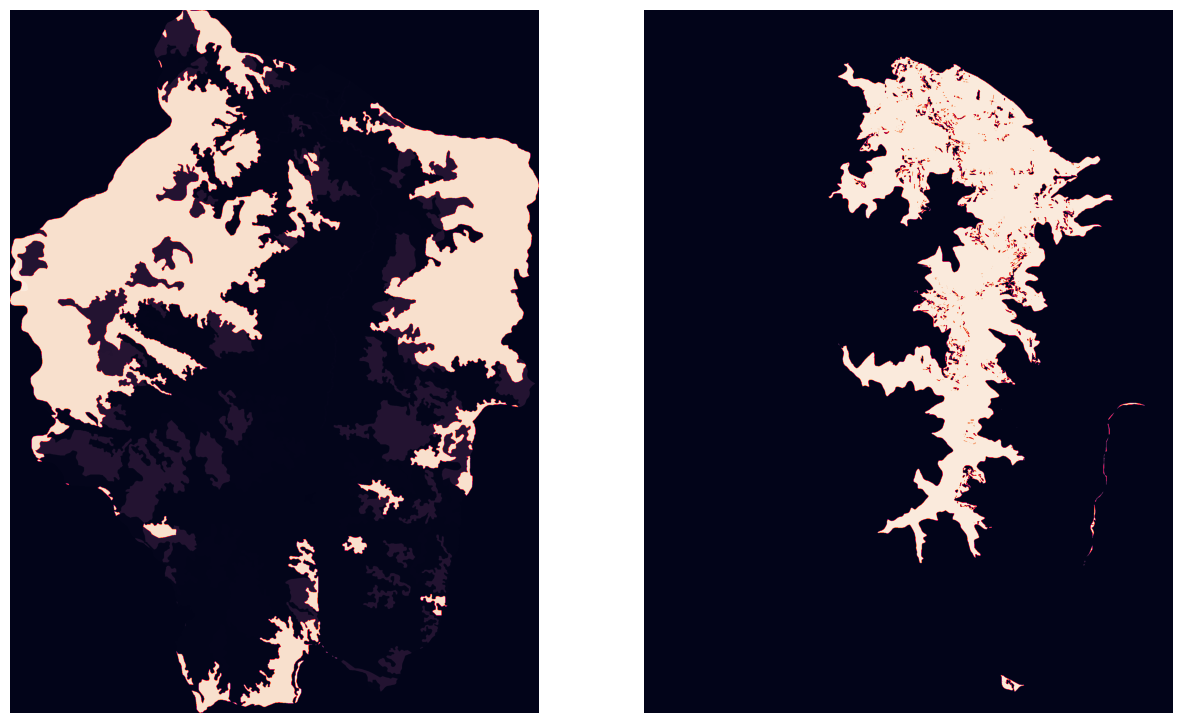

In [67]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
ax = plt.imshow(cob_3_2010_2012)
plt.axis('off')
ax

plt.subplot(1,2,2)
ax = plt.imshow(simul_condi)
plt.axis('off')
ax

plt.show()

In [65]:
s = pd.DataFrame(cob_3_2010_2012.ravel(), columns= ['valores']).value_counts().sort_index().to_frame()

s = pd.merge( s , pd.DataFrame(simul_compl.ravel(), columns= ['valores']).value_counts().sort_index().to_frame() , how='outer', left_index=True , right_index=True )

s.columns = [cob_nams[len(cob_nams)-1], 'simu_compl']

s

,cob_3_2010_2012,simu_compl
valores,,
-9223372036854775808,NaN,3836317.0
0,3076771.0,NaN
111,5216.0,5220.0
231,145853.0,59775.0
232,608.0,NaN
233,218037.0,107274.0
242,330657.0,448951.0
243,1079846.0,1530948.0
244,574358.0,533383.0


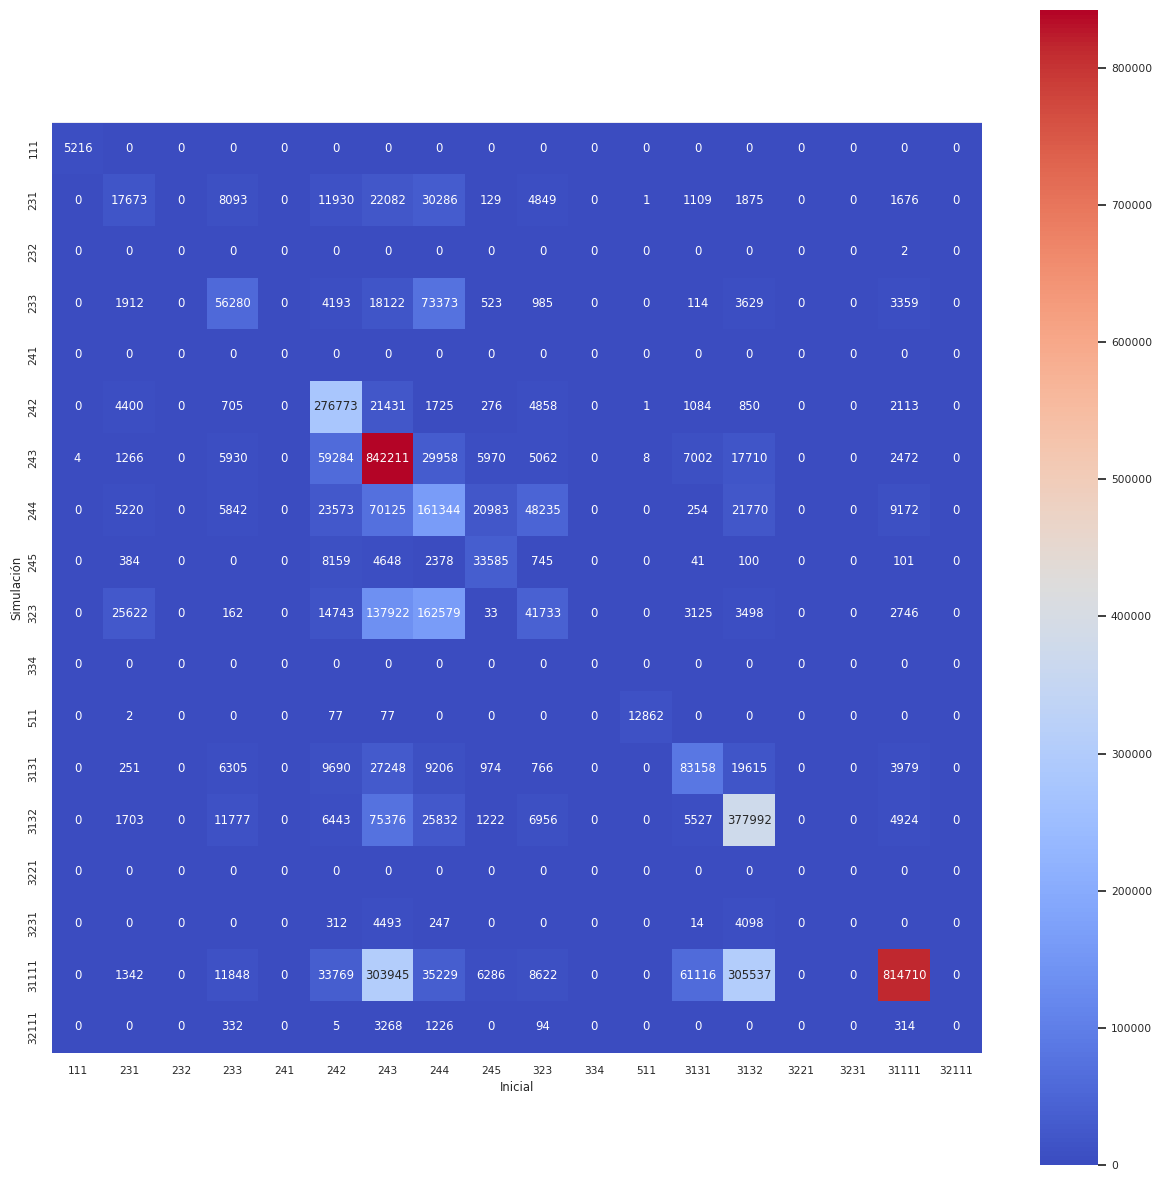

In [62]:
sns.set(rc={'figure.figsize':(15,15)}, font_scale=0.7)
y_labels=cob_cods
sns.heatmap(tm_compl, vmin=0, square=True, annot=True, cbar=True, cmap='coolwarm',xticklabels=y_labels, yticklabels=y_labels, fmt='.10g')
plt.xlabel("Inicial")
plt.ylabel("Simulación")
plt.show()

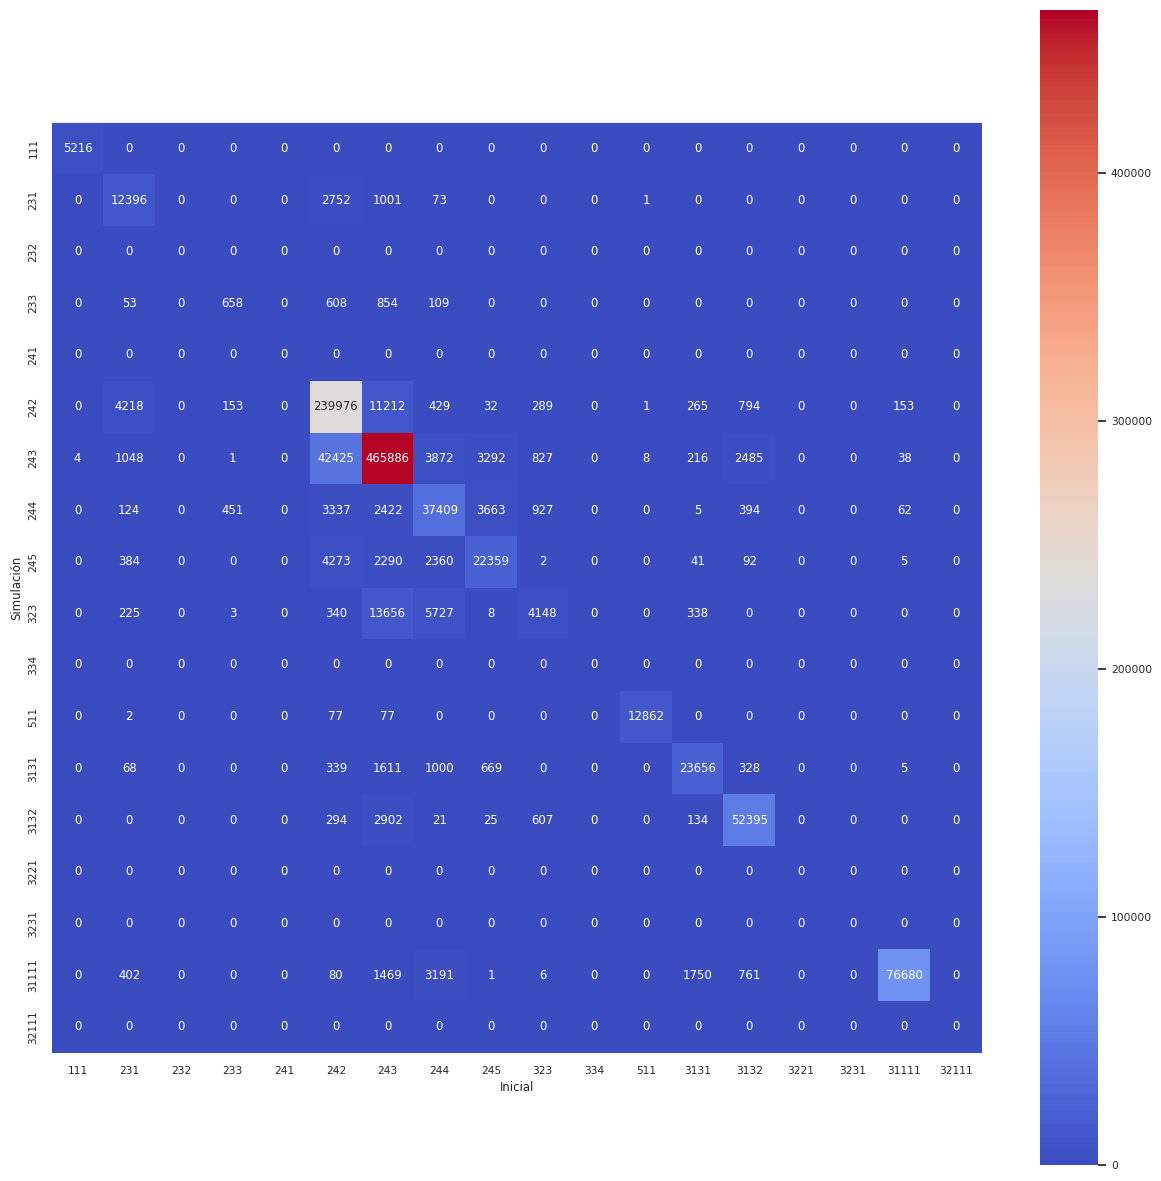

In [63]:
sns.set(rc={'figure.figsize':(15,15)}, font_scale=0.7)
y_labels=cob_cods
sns.heatmap(tm_condi, vmin=0, square=True, annot=True, cbar=True, cmap='coolwarm',xticklabels=y_labels, yticklabels=y_labels, fmt='.10g')
plt.xlabel("Inicial")
plt.ylabel("Simulación")
plt.show()